In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

In [2]:
e_comm_data = pd.read_csv('Data/Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
e_comm_data = e_comm_data[['Clothing ID', 
                           'Age', 
                           'Rating', 
                           'Recommended IND', 
                           'Positive Feedback Count', 
                           'Division Name',
                           'Department Name', 
                           'Class Name']]

In [4]:
e_comm_data.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9513,871,91,5,1,15,General,Tops,Knits
19084,867,27,2,0,0,General,Tops,Knits
20457,1094,54,5,1,0,General Petite,Dresses,Dresses
17332,862,56,5,1,0,General Petite,Tops,Knits
6650,836,25,5,1,0,General,Tops,Blouses
15067,886,47,3,0,7,General,Tops,Knits
17272,866,23,5,1,0,General Petite,Tops,Knits
5369,985,59,5,1,5,General Petite,Jackets,Jackets
20217,1078,48,2,0,0,General,Dresses,Dresses
4493,1038,44,5,1,1,General,Bottoms,Jeans


In [5]:
e_comm_data.shape

(23486, 8)

In [6]:
e_comm_data = e_comm_data[['Rating', 'Recommended IND']]
e_comm_data.head()

,Rating,Recommended IND
0,4,1
1,5,1
2,3,0
3,5,1
4,5,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020869930F60>]],
      dtype=object)

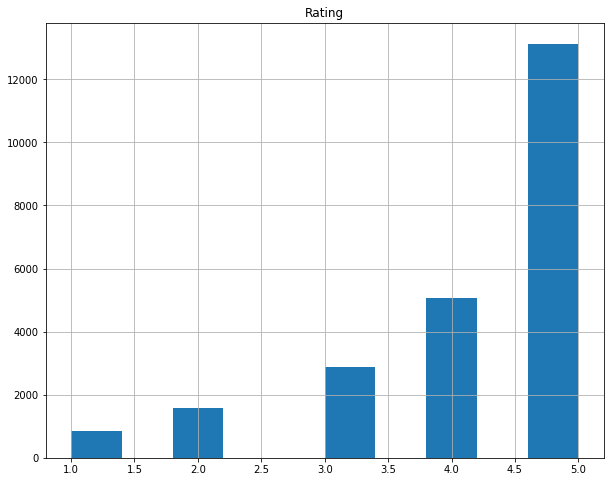

In [7]:
e_comm_data[['Rating']].hist(figsize=(10, 8))

In [8]:
df_for_obs = pd.crosstab(e_comm_data['Recommended IND'], e_comm_data['Rating'])
df_for_obs

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13106


In [9]:
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(df_for_obs.values)

In [10]:
print('Chi2 stats: {}'. format(round(chi2, 3)))

Chi2 stats: 16722.503


In [11]:
print('Chi2 stats: {}'. format(p_value))

Chi2 stats: 0.0


In [12]:
print('Chi2 stats: {}'. format(degrees_of_freedom))

Chi2 stats: 4


In [13]:
expected_values

array([[  149.57097846,   278.00306566,   509.99795623,   901.86681427,
         2332.56118539],
       [  692.42902154,  1286.99693434,  2361.00204377,  4175.13318573,
        10798.43881461]])

In [14]:
expected_df = pd.DataFrame({
            '0': expected_values[0],
            '1': expected_values[1]
            })

In [15]:
expected_df

,0,1
0,149.570978,692.429022
1,278.003066,1286.996934
2,509.997956,2361.002044
3,901.866814,4175.133186
4,2332.561185,10798.438815


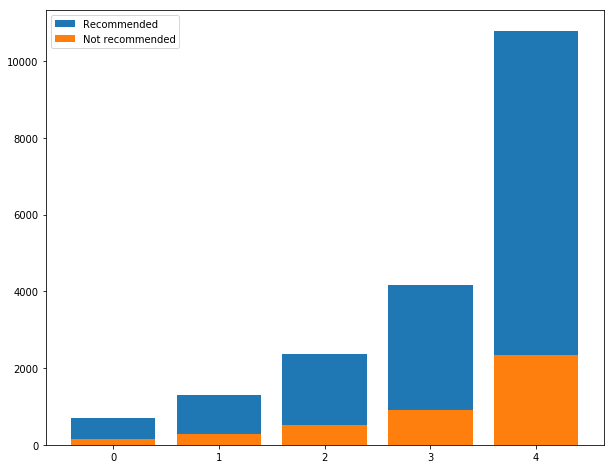

In [16]:
plt.figure(figsize=(10, 8))

plt.bar(expected_df.index, expected_df['1'], label='Recommended')
plt.bar(expected_df.index, expected_df['0'], label='Not recommended')

plt.legend()

In [17]:
ratings_recommended = e_comm_data[e_comm_data['Recommended IND'] == 1]
ratings_not_recommended = e_comm_data[e_comm_data['Recommended IND'] == 0]

In [18]:
ratings_recommended.shape, ratings_not_recommended.shape

((19314, 2), (4172, 2))

In [19]:
ratings_recommended.sample(10)

,Rating,Recommended IND
21500,4,1
9253,5,1
16211,5,1
1045,5,1
2490,4,1
1336,5,1
16739,5,1
13377,5,1
13290,4,1
15744,4,1


In [20]:
ratings_not_recommended.sample(10)

,Rating,Recommended IND
23031,2,0
11867,1,0
15751,2,0
20843,2,0
11570,2,0
22849,3,0
21725,3,0
16296,2,0
10453,3,0
21041,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020869A488D0>]],
      dtype=object)

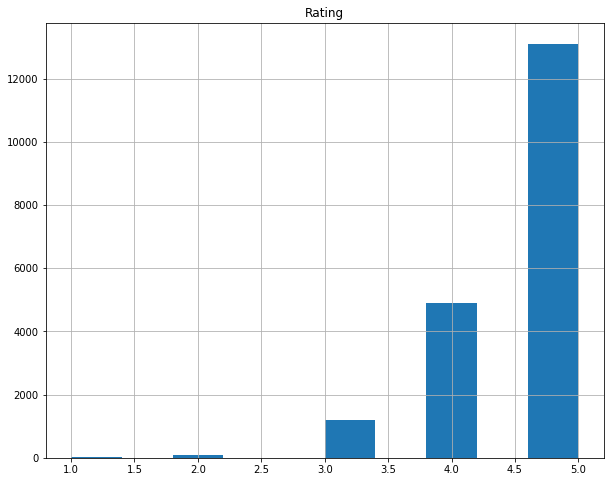

In [21]:
ratings_recommended[['Rating']].hist(figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020869A748D0>]],
      dtype=object)

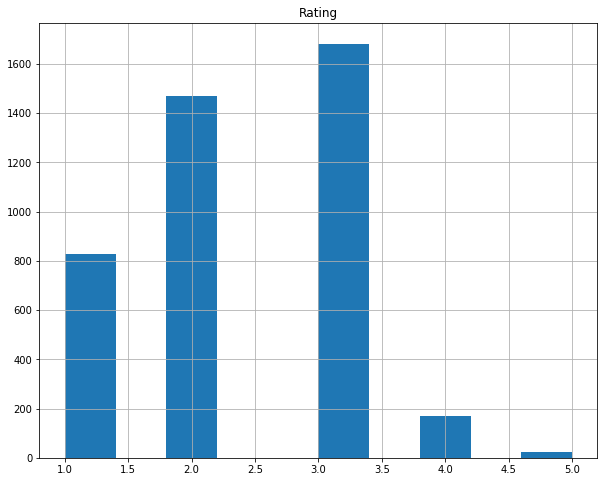

In [22]:
ratings_not_recommended[['Rating']].hist(figsize=(10, 8))

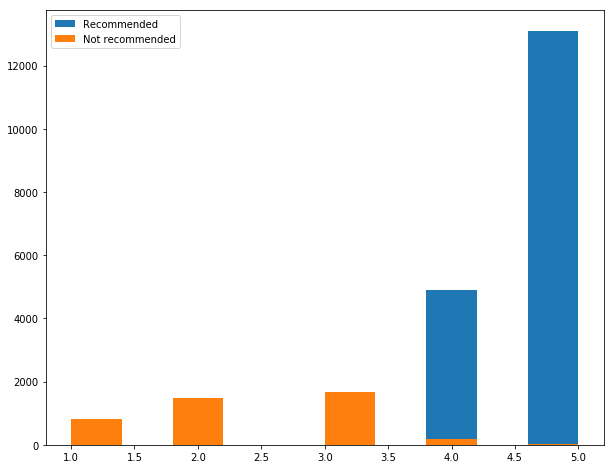

In [23]:
plt.figure(figsize=(10, 8))

plt.hist(ratings_recommended['Rating'], label='Recommended')
plt.hist(ratings_not_recommended['Rating'], label='Not recommended')

plt.legend()